# Assignment \#2 - the Hawaii-Emperor Seamount Chain (174 points)

__(Instruction)__ The purpose of this assignment is to make sure you have basic skills to take advantage of Numpy in scientific data analysis.

- All the array calculations should take advantage of the vectorized operations in numpy.  No iteration is allowed.  If used, it will be regarded as a wrong answer.  


Due : 03/03/2022, 11:59pm

## 1. Background

The outermost shell of the solid Earth consists of more than 40 rigid plates (~200 km thick) which are moving.  Many large scale geological processes can be explained by the interactions between the plates, plate tectonics.  One of the most notable geological features related to the plate tectonics, can be found under the Pacific ocean.  The image below shows two linear structures in the ocean bottom topography of the Pacific: Hawaiian seamount chain and Emperor seamount chain.  This linear alignment of the seamounts extends more than 6000 km.    

![](Oceanfloor.jpg)

One of the most popular hypothesis to explain the formation of such large scale seamount chains is that a fixed source of plume from the deep mantle (about 3000 km deep) provides materials to the surface which is moving north west (Pacific plate).  An [animation here](https://youtu.be/QtIQ7-iOFg8) shows how such process can form the seamount chains.

As shown in the figure below, Earth scientists have measured the ages of the seamounts.  Assuming that the current eruption location at Hawaii (Kilauea) has been the location of the plume for the last 60 Ma, we can calculate the velocity of plate motion over the period.

![](Map.jpg)
![](Kilauea.gif)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'  # for hi-dpi displays

Below is an example of using plot, and axhline funcions, and how to add title, labels and legend. You can follow this example to make your own plots in this homework. 

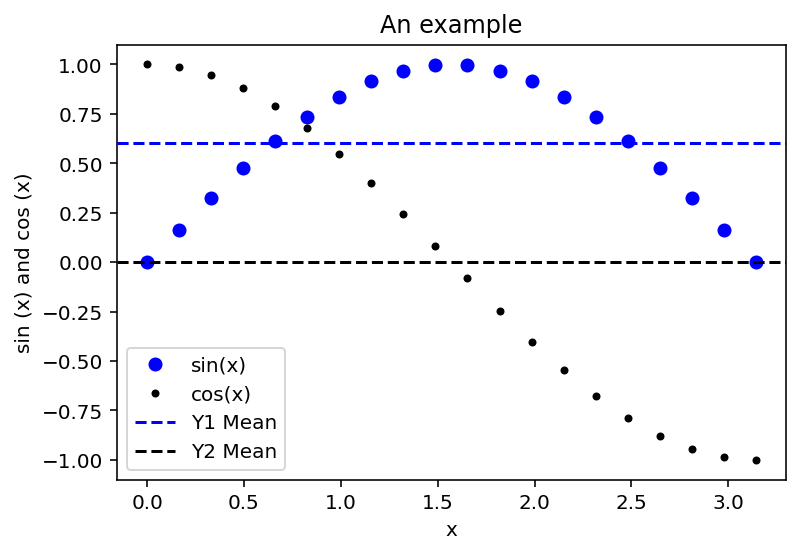

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,np.pi,20)
y1=np.sin(x)
y2=np.cos(x)
plt.plot(x,y1, 'bo', label='sin(x)')
plt.plot(x,y2,'k.',label='cos(x)')
plt.axhline(y1.mean(), c='b', ls='--', label='Y1 Mean')
plt.axhline(y2.mean(), c='k', ls='--', label='Y2 Mean')
plt.ylabel('sin (x) and cos (x)')
plt.xlabel('x');
plt.title('An example')
plt.legend();

## 2. Read dataset (2 pts)

I obtained a dataset on the seamounts along the Hawaii-Emperor chain from https://www.soest.hawaii.edu/GG/HCV/haw_formation.html and saved it in `Hawaii_emperor_data.txt`.  You will use this dataset for this assignment.

In [3]:
%ls

 Volume in drive C is OS
 Volume Serial Number is EEBF-1F77

 Directory of c:\Users\manna\Documents\SES 598 - Python for Graduate Research\Assignments\Assignment 2

03/03/2022  05:48 PM    <DIR>          .
02/17/2022  01:11 PM    <DIR>          ..
02/28/2022  12:46 PM    <DIR>          .ipynb_checkpoints
02/28/2022  01:23 PM    <DIR>          .vscode
02/17/2022  08:10 PM               598 Hawaii_emperor_data.txt
02/17/2022  08:10 PM            44,046 Kilauea.gif
02/17/2022  08:10 PM           243,473 Map.jpg
02/17/2022  08:10 PM            23,952 Oceanfloor.jpg
03/03/2022  11:40 AM           375,161 Rana-Mannat-HW02.ipynb
               5 File(s)        687,230 bytes
               4 Dir(s)  335,686,512,640 bytes free


You may check the contents of the file.

In [4]:
%less Hawaii_emperor_data.txt

Distance along chain (km)	K-Ar age (Ma)	sigma age (Ma)
0	0.00	0.00
54	0.38	0.05
100	0.43	0.02
182	0.75	0.04
185	1.03	0.18
221	1.32	0.04
226	1.28	0.04
256	1.76	0.04
280	1.90	0.06
339	2.60	0.1
374	3.70	0.1
519	5.10	0.20
565	4.89	0.11
600	4.00	0.2
780	7.20	0.3
913	9.20	0.8
930	9.60	0.8
1058	10.30	0.4
1209	12.00	0.4
1256	13.00	0.6
1435	12.30	1.0
1818	19.90	0.3
1841	26.60	2.7
2281	20.60	2.7
2432	27.70	0.6
2600	28.00	0.4
2825	27.40	0.5
3128	38.60	0.3
3280	38.70	0.9
3493	42.40	2.3
3520	43.40	1.6
3668	39.90	1.2
3758	48.10	0.8
4102	55.20	0.7
4175	55.40	0.9
4452	56.20	0.6
4794	59.60	0.6
4860	64.70	1.1

As shown above, you can find three columns of data.  Starting from left to right, they are: distances from Kilauea in km, age differences from Kilauea in Ma, and uncertainties for the age in Ma.  __Kilauea__ is a currently active shield volcano in the Hawaiian Islands as shown in the map above.

Read the columns in the data file and store them in three variables: `d` for the distance, `a` for the age, and `s_a` for the uncertainty, using `np.loadtxt`.  The delimiter should be '\t' which is a tab.

In [5]:
d, a, s_a = np.loadtxt('Hawaii_emperor_data.txt', skiprows=1, unpack=True, delimiter='\t')
print(f'd: {d}')
print(f'a: {a}')
print(f's_a: {s_a}')

d: [   0.   54.  100.  182.  185.  221.  226.  256.  280.  339.  374.  519.
  565.  600.  780.  913.  930. 1058. 1209. 1256. 1435. 1818. 1841. 2281.
 2432. 2600. 2825. 3128. 3280. 3493. 3520. 3668. 3758. 4102. 4175. 4452.
 4794. 4860.]
a: [ 0.    0.38  0.43  0.75  1.03  1.32  1.28  1.76  1.9   2.6   3.7   5.1
  4.89  4.    7.2   9.2   9.6  10.3  12.   13.   12.3  19.9  26.6  20.6
 27.7  28.   27.4  38.6  38.7  42.4  43.4  39.9  48.1  55.2  55.4  56.2
 59.6  64.7 ]
s_a: [0.   0.05 0.02 0.04 0.18 0.04 0.04 0.04 0.06 0.1  0.1  0.2  0.11 0.2
 0.3  0.8  0.8  0.4  0.4  0.6  1.   0.3  2.7  2.7  0.6  0.4  0.5  0.3
 0.9  2.3  1.6  1.2  0.8  0.7  0.9  0.6  0.6  1.1 ]


## 3. Unit conversion (2 pts)

Convert the units of distance and age from km to cm and from Ma to year, and save them in new variables, `distance` and `age`, respectively.

In [6]:
distance = d * 100000
age = a * 1000000
print(f'distance: {distance}')
print(f'age: {age}')

distance: [0.000e+00 5.400e+06 1.000e+07 1.820e+07 1.850e+07 2.210e+07 2.260e+07
 2.560e+07 2.800e+07 3.390e+07 3.740e+07 5.190e+07 5.650e+07 6.000e+07
 7.800e+07 9.130e+07 9.300e+07 1.058e+08 1.209e+08 1.256e+08 1.435e+08
 1.818e+08 1.841e+08 2.281e+08 2.432e+08 2.600e+08 2.825e+08 3.128e+08
 3.280e+08 3.493e+08 3.520e+08 3.668e+08 3.758e+08 4.102e+08 4.175e+08
 4.452e+08 4.794e+08 4.860e+08]
age: [       0.   380000.   430000.   750000.  1030000.  1320000.  1280000.
  1760000.  1900000.  2600000.  3700000.  5100000.  4890000.  4000000.
  7200000.  9200000.  9600000. 10300000. 12000000. 13000000. 12300000.
 19900000. 26600000. 20600000. 27700000. 28000000. 27400000. 38600000.
 38700000. 42400000. 43400000. 39900000. 48100000. 55200000. 55400000.
 56200000. 59600000. 64700000.]


## 4. Plot age versus distance (8 pts)

Plot `age` ($y$-axis) versus `distance` ($x$-axis).  

- Label the axes together with the units for the numbers

- Add a title: "Age of seamounts along the Hawaii-Emperor chain"  

- Use blue solid circles for the data points.

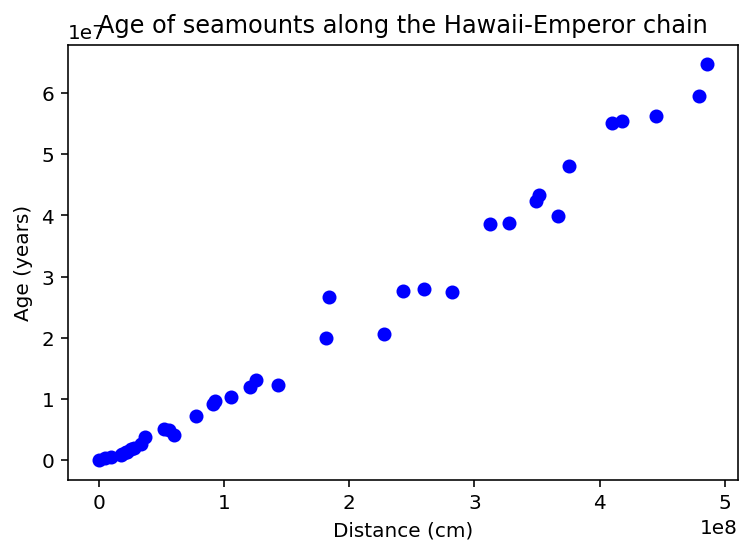

In [7]:
plt.plot(distance, age, 'bo')
plt.title('Age of seamounts along the Hawaii-Emperor chain')
plt.ylabel('Age (years)')
plt.xlabel('Distance (cm)')
plt.show()

## 5. Velocities measured from Kilauea

### 5.1. Calculate velocities (2 pts)

Calculate the velocities of the plate motion (cm/yr) from the distance (from Kilauea) and age of each seamount. Please assign the velocities to a variable `v_k`. Note that the first data point is for Kilauea.

In [8]:
v_k = distance[1:] / age[1:]
print(f'v_k: {v_k}')

v_k: [14.21052632 23.25581395 24.26666667 17.96116505 16.74242424 17.65625
 14.54545455 14.73684211 13.03846154 10.10810811 10.17647059 11.55419223
 15.         10.83333333  9.92391304  9.6875     10.27184466 10.075
  9.66153846 11.66666667  9.13567839  6.92105263 11.07281553  8.77978339
  9.28571429 10.31021898  8.10362694  8.4754522   8.23820755  8.11059908
  9.19298246  7.81288981  7.43115942  7.53610108  7.92170819  8.04362416
  7.51159196]


### 5.2. Plot velocities measured from Kilauea (8 pts)

Plot the velocities ($y$ axis) calculated in this way for all the data points except for Kilauea as a function of the age ($x$ axis) of the seamounts.  

- Label both $x$ and $y$ axes with units for the numbers
- Add a title to the figure: "Velocity measured from Kilauea"
- Use blue solid circles for the data points

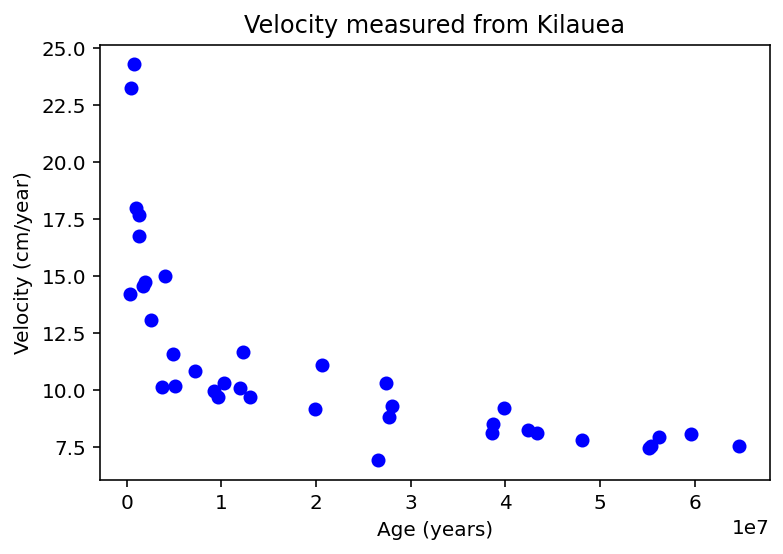

In [9]:
plt.plot(age[1:], v_k, 'bo')
plt.title('Velocity measured from Kilauea')
plt.xlabel('Age (years)')
plt.ylabel('Velocity (cm/year)')
plt.show()

### 5.3. Calculate statistical indexes (12 pts)

Calculate mean, median, and standard deviation of the velocities using the `np.mean`, `np.median`, and `np.std` functions, respectively.  You can use help(np.mean), help(np.median) and help(np.std) to learn how to use these functions.

Print these three indexes in a form of: "Mean velocity from Kilauea = x.xx cm/year", "Median velocity from Kilauea = x.xx cm/year", and "Standard deviation of velocity from Kilauea = x.xx cm/year" where `x.xx` are your numbers to the second decimal point.

In [10]:
vel_mean = np.mean(v_k)
vel_median = np.median(v_k)
vel_std_dev = np.std(v_k)
print(f'Mean velocity from Kilauea = {vel_mean:.2f}')
print(f'Median velocity from Kilauea = {vel_median:.2f}')
print(f'Standard deviation of velocity from Kilauea = {vel_std_dev:.2f}')

Mean velocity from Kilauea = 11.33
Median velocity from Kilauea = 10.07
Standard deviation of velocity from Kilauea = 4.16


### 5.4. Plot mean and median together with the velocity data (16 pts)

Plot the velocity data together with the mean and median values you calculated above.  

- Use the same format as in __5.2__ for the data points, labels, and title.

- Plot mean and median values as horizontal lines.  The $y$ values of the horizontal lines should be the mean and median values.  Use the `plt.axhline` function.  Use black solid line and black dashed line for the median and mean values, respectively.  

- Add a legend for the velocity data points, the mean value line, and the median value line.

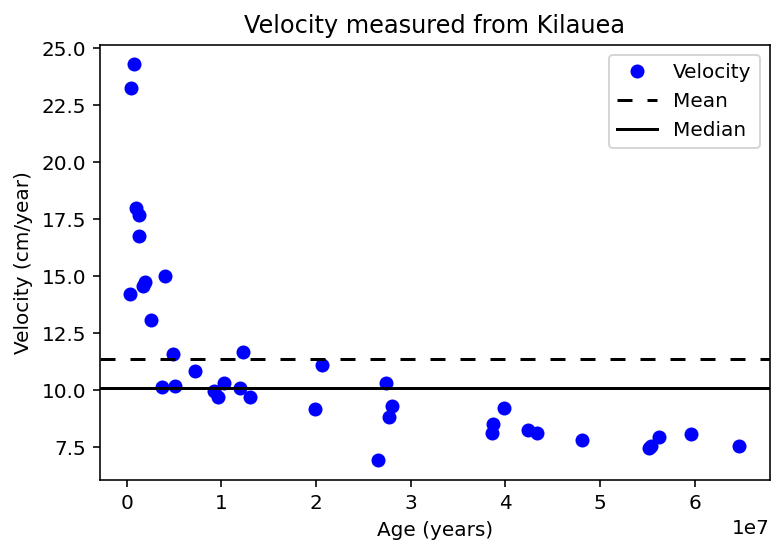

In [11]:
plt.plot(age[1:], v_k, 'bo')
plt.title('Velocity measured from Kilauea')
plt.xlabel('Age (years)')
plt.ylabel('Velocity (cm/year)')
plt.axhline(vel_mean, color='black', dashes=(5,5))
plt.axhline(vel_median, color='black')
plt.legend(['Velocity', 'Mean', 'Median'])
plt.show()

### 5.5. Discussion

- Does the velocity remain constant along the Hawaii-Emperor chain when calculated from Kilauea?

**The velocity along the Hawaii-Emperor chain when calculated from Kilauea does not remain constant.**

- If not constant, what trend do you observe?

**The trend that can be observed from the above graph is that the velocity along the chain from Kilauea is inversely quadratically proportional to the age.**

- Can an average we obtained above be representative velocity for the Pacific plates over the last 60 Ma?

**The average we obtained above is not representative of the velocities of the Pacific plates over the last 60 Ma.**

- If not, why?

**The high standard deviation of the Pacific plate velocities shows that the mean velocity is not a accurate representation of their velocities.**

## 6. Velocities at different time intervals

In our class, we learned how to calculate velocities at different distances using a (time, distance) dataset.  We will use the same method (vectorized operations in Numpy) to calculate velocities of the Pacific plates at different age intervals using the (seamount age, seamount distance) dataset.

### 6.1. Calculate velocities and ages (8 pts)

Calculate age differences between neighboring data points and store them in a variable, `delta_age`.  

In [12]:
delta_age = age[2:] - age[1:-1]
print(f'delta_age: {delta_age}')

delta_age: [   50000.   320000.   280000.   290000.   -40000.   480000.   140000.
   700000.  1100000.  1400000.  -210000.  -890000.  3200000.  2000000.
   400000.   700000.  1700000.  1000000.  -700000.  7600000.  6700000.
 -6000000.  7100000.   300000.  -600000. 11200000.   100000.  3700000.
  1000000. -3500000.  8200000.  7100000.   200000.   800000.  3400000.
  5100000.]


Calculate distance differences between neighboring data points and store them in a variable, `delta_dis`.  

In [13]:
delta_dis = distance[2:] - distance[1:-1]
print(f'delta_dis = {delta_dis}')

delta_dis = [ 4600000.  8200000.   300000.  3600000.   500000.  3000000.  2400000.
  5900000.  3500000. 14500000.  4600000.  3500000. 18000000. 13300000.
  1700000. 12800000. 15100000.  4700000. 17900000. 38300000.  2300000.
 44000000. 15100000. 16800000. 22500000. 30300000. 15200000. 21300000.
  2700000. 14800000.  9000000. 34400000.  7300000. 27700000. 34200000.
  6600000.]


Calculate velocities for different neighboring seamount pairs in the dataset and save them in `v_p`.  

As we found in our class examples, you should also calculate average ages for neighboring seamount pairs to plot `v_p`.  Calculate this and save in a variable, `t_p`.

In [14]:
v_p = delta_dis / delta_age
t_p = (age[2:] + age[1:-1]) / 2
print(f'v_p = {v_p}')
print(f't_p = {t_p}')

v_p = [ 92.          25.625        1.07142857  12.4137931  -12.5
   6.25        17.14285714   8.42857143   3.18181818  10.35714286
 -21.9047619   -3.93258427   5.625        6.65         4.25
  18.28571429   8.88235294   4.7        -25.57142857   5.03947368
   0.34328358  -7.33333333   2.12676056  56.         -37.5
   2.70535714 152.           5.75675676   2.7         -4.22857143
   1.09756098   4.84507042  36.5         34.625       10.05882353
   1.29411765]
t_p = [  405000.   590000.   890000.  1175000.  1300000.  1520000.  1830000.
  2250000.  3150000.  4400000.  4995000.  4445000.  5600000.  8200000.
  9400000.  9950000. 11150000. 12500000. 12650000. 16100000. 23250000.
 23600000. 24150000. 27850000. 27700000. 33000000. 38650000. 40550000.
 42900000. 41650000. 44000000. 51650000. 55300000. 55800000. 57900000.
 62150000.]


### 6.2. Calculate statistical indexes for the velocities (12 pts)

Calculate mean, median, and standard deviation of the velocities using the `np.mean`, `np.median`, and `np.std` functions, respectively.  Print these three indexes in the format we used in __5.3__.

In [15]:
vel_p_mean = np.mean(v_p)
vel_p_median = np.median(v_p)
vel_p_std_dev = np.std(v_p)
print(f'Mean velocity from Kilauea = {vel_p_mean:.2f}')
print(f'Median velocity from Kilauea = {vel_p_median:.2f}')
print(f'Standard deviation of velocity from Kilauea = {vel_p_std_dev:.2f}')

Mean velocity from Kilauea = 11.86
Median velocity from Kilauea = 4.94
Standard deviation of velocity from Kilauea = 32.07


### 6.3. Plot mean and median together with velocities at different time interval (16 pts)

Plot the velocity data together with the mean and median values you calculated above.  

- Follow the same notations as in the Figure we made in __5.4__ above.  

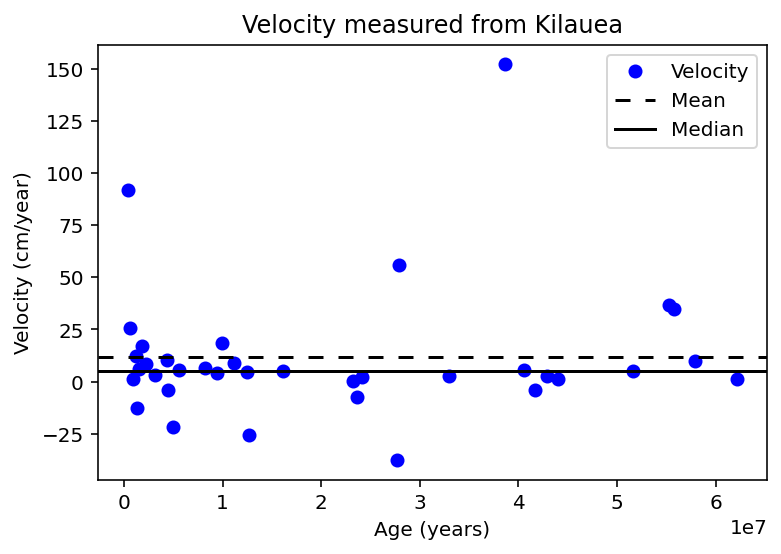

In [16]:
plt.plot(t_p, v_p, 'bo')
plt.title('Velocity measured from Kilauea')
plt.xlabel('Age (years)')
plt.ylabel('Velocity (cm/year)')
plt.axhline(vel_p_mean, color='black', dashes=(5,5))
plt.axhline(vel_p_median, color='black')
plt.legend(['Velocity', 'Mean', 'Median'])
plt.show()

### 6.4. Discussion

- Do you think all the velocity values are reasonable?

**I do not think that all of the velocity values are reasonable.**

- If not, what are the values you believe unreasonable?

**The values that I believe are unreasonable are the negative velocity values. The velocity of a Pacific plate logically cannot be negative.**

- Why did you get those unreasonable values?

**The unreasonable values are a result of the negative values in the delta_age array. These arise from the fact that some neighboring islands moved faster than their neighbors, and since the data is organized by the distance from Kilauea, the islands that were significantly slower caused negative delta_age values.**

### 6.5. Mask unreasonable velocity values (8 pts)

The plot in __6.3__ reveals some velocity values that are negative.  Although it is not entirely impossible, we will _mask_ the negative values from our statistical analysis.  To do this, we use the `np.ma.masked_where` function.  The example below demonstrates how to use the function.  You can get more information by using help(np.ma.masked_where).

In [17]:
x = np.asarray([ 0., 1., 2., 0., 3., 2., 1.])
y = np.asarray([13.,14.,15.,16.,17.,18.,19.])
x_masked = np.ma.masked_where(y <= 13, x)
y_masked = np.ma.masked_where(y <= 13, y)
print(x_masked)
print(y_masked)

[-- 1.0 2.0 0.0 3.0 2.0 1.0]
[-- 14.0 15.0 16.0 17.0 18.0 19.0]


Line 4 above shows how you can mask any `y` values equal to or less than 13 from the `y` array.  Sometimes you also want to mask the corresponding `x` values for `y` <= 13.  Line 3 shows how to achieve this for the `x` array.

Now in the cell below mask the ``(a_p, v_p)`` dataset such that you can only take into account the positive velocities.  Save the masking results in `v_p_m` and `t_p_m` for the velocity data and the age data, respectively.

In [18]:
v_p_m = np.ma.masked_where(v_p < 0, v_p)
t_p_m = np.ma.masked_where(v_p < 0, t_p)
print(f'v_p_m = {v_p_m}')
print(f't_p_m = {t_p_m}')

v_p_m = [92.0 25.625 1.0714285714285714 12.413793103448276 -- 6.25
 17.142857142857142 8.428571428571429 3.1818181818181817
 10.357142857142858 -- -- 5.625 6.65 4.25 18.285714285714285
 8.882352941176471 4.7 -- 5.0394736842105265 0.34328358208955223 --
 2.1267605633802815 56.0 -- 2.705357142857143 152.0 5.756756756756757 2.7
 -- 1.0975609756097562 4.845070422535211 36.5 34.625 10.058823529411764
 1.2941176470588236]
t_p_m = [405000.0 590000.0 890000.0 1175000.0 -- 1520000.0 1830000.0 2250000.0
 3150000.0 4400000.0 -- -- 5600000.0 8200000.0 9400000.0 9950000.0
 11150000.0 12500000.0 -- 16100000.0 23250000.0 -- 24150000.0 27850000.0
 -- 33000000.0 38650000.0 40550000.0 42900000.0 -- 44000000.0 51650000.0
 55300000.0 55800000.0 57900000.0 62150000.0]


### 6.6. Calculate statistical indexes after masking (12 pts)

Calculate mean, median, and standard deviation of the velocities using the `np.mean`, `np.median`, and `np.std` functions, respectively.  Print these three indexes in the format we used in __5.3__.

In [19]:
vel_p_m_mean = np.ma.mean(v_p_m)
vel_p_m_median = np.ma.median(v_p_m)
vel_p_m_std_dev = np.ma.std(v_p_m)
print(f'Mean velocity from Kilauea = {vel_p_m_mean:.2f}')
print(f'Median velocity from Kilauea = {vel_p_m_median:.2f}')
print(f'Standard deviation of velocity from Kilauea = {vel_p_m_std_dev:.2f}')

Mean velocity from Kilauea = 18.62
Median velocity from Kilauea = 6.25
Standard deviation of velocity from Kilauea = 31.76


### 6.7. Plot mean and median after masking (16 pts)

Plot the velocity data together with the mean and median values you calculated above.  

- Follow the same notations as in the Figure we made in __5.4__ above.  

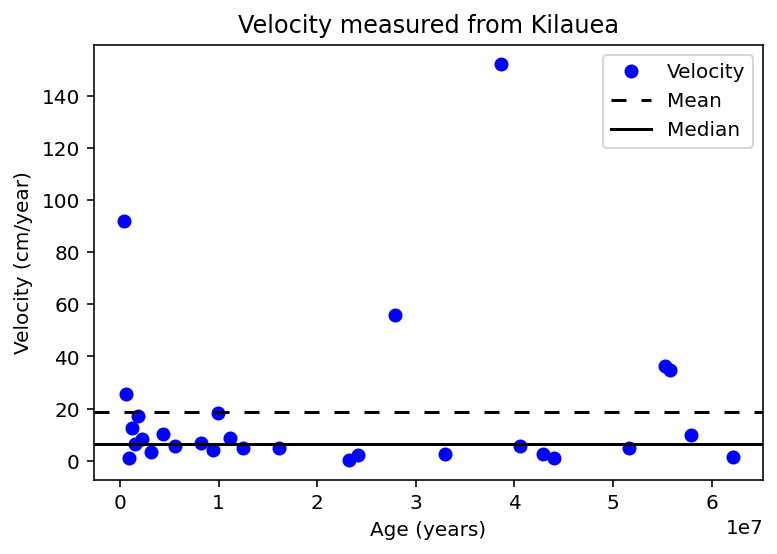

In [20]:
plt.plot(t_p_m, v_p_m, 'bo')
plt.title('Velocity measured from Kilauea')
plt.xlabel('Age (years)')
plt.ylabel('Velocity (cm/year)')
plt.axhline(vel_p_m_mean, color='black', dashes=(5,5))
plt.axhline(vel_p_m_median, color='black')
plt.legend(['Velocity', 'Mean', 'Median'])
plt.show()

### 6.8. Discussion

- Between mean and median values for the velocities, which one looks more representative of the dataset?

**The *median* value for the velocities looks far more representative of the dataset than the mean does.**

- Explain your answer for the question above.

**Since the mean value is more affected bu outlier datapoints, the extremely fast plates skew the mean high, whereas the median filters these points better, and thus aligns more with the majority of the plate velocity datapoints.**

## 7. Fitting to a linear trend

### 7.1. Fitting using np.polyfit (6 pts)

As shown in our assignment \#1, you can fit a dataset to a line using the `np.polyfit` function. You can also run help(np.polyfit) to learn more details about this function. Conduct a linear fit and find out the average plate velocity for the last 60 Ma.    

- For fitting to a line, you need to set the third argument for the `np.polyfit` function to 1.  It will return, then, a numpy array with two parameters.  The first one is slope and the second one is intercept.  

- Set `distance` as the independent variable and `age` as the dependent variable for the fitting.

- Print velocity using the fitting result in: "Velocity = x.xx cm/year" (x.xx is your number to the second decimal point).

- Print the intercept of the fitting result in: "Age at zero distance = x.xxe+xx year" (x.xxe+xx is your number in the `scientific number` format to the second decimal point).

In [21]:
slope, intercept = np.polyfit(distance, age, 1)
print(f'Velocity = {(1 / slope):.2f} cm/year')
print(f'Age at zero distance = {intercept:.2e} year')

Velocity = 7.74 cm/year
Age at zero distance = -2.36e+06 year


### 7.2. Plot the fitting result together with the data (10 pts)

Plot the distance ($x$ axis) versus age ($y$ axis) data together with your fitting result.  

- Plot the data points in blue solid circles.

- Label the axes with units.

- Add a title: "Fitting to a line"

- Plot your fitting line as a black solid line.

- Add legend for fitting line and data points.

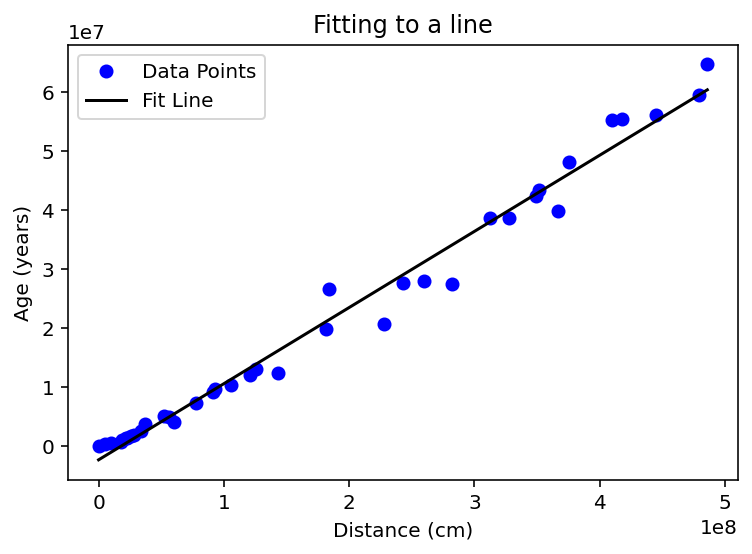

In [22]:
plt.plot(distance, age, 'bo')
plt.xlabel('Distance (cm)')
plt.ylabel('Age (years)')
plt.title('Fitting to a line')
fit_line = (slope * distance) + intercept
plt.plot(distance, fit_line, 'k')
plt.legend(['Data Points', 'Fit Line'])
plt.show()

### 7.3. Discussion

- What is the velocity value did you get through this approach?

**The velocity value through this approach is *7.74 cm/year*.**

- Is your intercept zero?  If not, what is it and what does it mean?

**The intercept is not zero. The intercept is *-2.36 Ma*. The intercept would suggest that a new plate would age to about 2.36 Ma before any noticeable distance could be measured from Kilauea.**

- Does the nonzero intercept look statistically significant considering the data scatter? 

**The nonzero intercept does not look statistically significant given the data scatter as 2.36 Ma is an order of magnitude less than many of the age data points.**

## 8. The bend

The Hawaii-Emperor chain has a kink roughly at the half way.  The kink has been explained by a sudden change in the direction of the Pacific plate motion at 44 Ma.  


The figure below shows that the Emperor segment and the Hawaii segment have about 60 degrees between them instead of linear alignment between them.  If the seamount chain would have been formed through continued movement of the Pacific plate along one direction, it should be a straight chain.  Therefore, from the age of the location where the bend exists, it has been hypothesized that the plate motion direction was different before 44 Ma.  If the direction was different, can the plate velocity then be different before and after the event?  Can we see that in our dataset?

![](Oceanfloor.jpg)
![](Map.jpg)

In this section, we will divide the dataset into two subsets: one for age between 0 and 44 Ma and the other for age greater than 44 Ma.  Then we will fit the subsets separately to lines and see if we can find significant differences. 

Numpy provides you with convenient ways to find data points satisfying some _conditions_.  One such useful function for this case is `np.where`.  Here I show how to use the function to find indices for the "younger than the bend" and "older than the bend" subsets.

### 8.1. Make subsets (8 pts)

Using `np.ma.masked_where()`, find data points younger and old than 44 Ma and save them into two subsets, (`d_y`, `a_y`) ("younger than bend") and (`d_o`, `a_o`) ("older than bend"), respectively.

In [23]:
d_y = np.ma.masked_where(age > (44 * 1000000), distance)
a_y = np.ma.masked_where(age > (44 * 1000000), age)
d_o = np.ma.masked_where(age <= (44 * 1000000), distance)
a_o = np.ma.masked_where(age <= (44 * 1000000), age)
print(f'd_y = {d_y}')
print(f'a_y = {a_y}')
print(f'd_o = {d_o}')
print(f'a_o = {a_o}')

d_y = [0.0 5400000.0 10000000.0 18200000.0 18500000.0 22100000.0 22600000.0
 25600000.0 28000000.0 33900000.0 37400000.0 51900000.0 56500000.0
 60000000.0 78000000.0 91300000.0 93000000.0 105800000.0 120900000.0
 125600000.0 143500000.0 181800000.0 184100000.0 228100000.0 243200000.0
 260000000.0 282500000.0 312800000.0 328000000.0 349300000.0 352000000.0
 366800000.0 -- -- -- -- -- --]
a_y = [0.0 380000.0 430000.0 750000.0 1030000.0 1320000.0 1280000.0 1760000.0
 1900000.0 2600000.0 3700000.0 5100000.0 4890000.0 4000000.0 7200000.0
 9200000.0 9600000.0 10300000.0 12000000.0 13000000.0 12300000.0
 19900000.0 26600000.0 20600000.0 27700000.0 28000000.0 27400000.0
 38600000.0 38700000.0 42400000.0 43400000.0 39900000.0 -- -- -- -- -- --]
d_o = [-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- 375800000.0 410200000.0 417500000.0 445200000.0
 479400000.0 486000000.0]
a_o = [-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

### 8.2. Fit the subsets of the data (12 pts)

Fit the "younger than bend" subset and print the velocity obtained from the slope of the fitted line in cm/year.  __Note that for fitting for masked arrays, you need to use `np.ma.polyfit()`, not `np.polyfit()`.__

Also, print the intercept of the line in year (age).  Use the same print format we used in __7.1__.  Save the fit results in `param_y`.

In [24]:
param_y = np.ma.polyfit(d_y, a_y, 1)
print(f'Velocity = {(1 / param_y[0]):.2f} cm/year')
print(f'Age at zero distance = {param_y[1]:.2e} year')

Velocity = 8.42 cm/year
Age at zero distance = -1.47e+06 year


Fit the "older than bend" subset and print the velocity obtained from the slope of the fitted line in cm/year.  __Note that for fitting for masked arrays, you need to use `np.ma.polyfit()`, not `np.polyfit()`.__

Also, print the intercept of the line in year (age). Use the same print format we used in __7.1__.  Save the fit results in `param_o`.

In [25]:
param_o = np.ma.polyfit(d_o, a_o, 1)
print(f'Velocity = {(1 / param_o[0]):.2f} cm/year')
print(f'Age at zero distance = {param_o[1]:.2e} year') 

Velocity = 8.26 cm/year
Age at zero distance = 3.80e+06 year


### 8.3. Plot fitting results (16 pts)

Plot the distance ($x$ axis) versus age ($y$ axis) data together with your fitting results.  

- For the data points, use closed blue circles and red circles for the data points younger and older than the bend, respectively.

- For the fit lines, use black, red, and blue lines for the fits for the entire dataset, the "old than bend" subset, and the "younger than bend" subset, respectively.

- Add a title: "Fitting for the bend".  

- Label both axes together with units for the numbers.  

- Provide legend for both the fit lines and data points.  

- Show the age of the bend (44 Ma) with a horizontal line using `plt.axhline`.

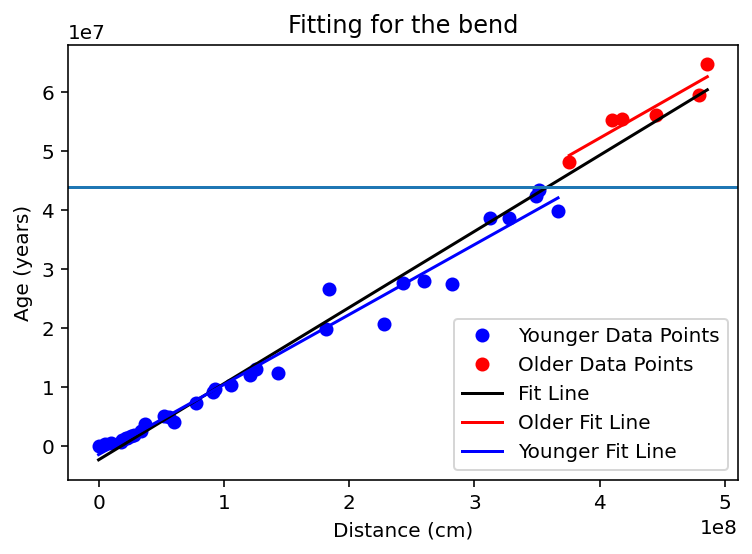

In [26]:
plt.plot(d_y, a_y, 'bo')
plt.plot(d_o, a_o, 'ro')
plt.plot(distance, fit_line, 'k')
fit_line_o = (param_o[0] * d_o) + param_o[1]
plt.plot(d_o, fit_line_o, 'r')
fit_line_y = (param_y[0] * d_y) + param_y[1]
plt.plot(d_y, fit_line_y, 'b')
plt.title('Fitting for the bend')
plt.xlabel('Distance (cm)')
plt.ylabel('Age (years)')
plt.legend(['Younger Data Points',
            'Older Data Points',
            'Fit Line',
            'Older Fit Line',
            'Younger Fit Line'
           ])
plt.axhline(44 * 1000000)
plt.show()